In [2]:
#import dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import scipy as sp
import sklearn as sk
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
import seaborn as sns
import joblib

Using TensorFlow backend.


In [3]:
#import dataframe
currentpoints_df = pd.read_csv('api/data/resources/currentpoints.csv')
currentpoints_df

,id,second_name,first_name,minutes,value_season,value_form,form,total_points,points_per_game,team,...,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,position
0,254,Salah,Mohamed,1651,11.7,0.4,4.6,146,7.3,Liverpool,...,0,0,0,16,442,696.8,487.9,1001.0,218.5,MID
1,302,Borges Fernandes,Bruno Miguel,1745,12.7,0.3,3.0,145,6.9,Man Utd,...,4,0,0,22,522,783.0,876.2,728.0,238.9,MID
2,390,Son,Heung-Min,1706,14.6,0.5,4.8,143,7.2,Spurs,...,0,0,0,18,458,657.8,526.8,638.0,182.6,MID
3,388,Kane,Harry,1654,12.9,0.5,6.0,143,7.5,Spurs,...,1,0,0,26,512,763.4,371.2,792.0,192.4,FWD
4,202,Bamford,Patrick,1695,18.0,0.8,5.0,119,6.0,Leeds,...,1,0,0,16,388,508.0,160.2,934.0,160.1,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,257,Wilson,Harry,0,0.0,0.0,0.0,0,0.0,Liverpool,...,0,0,0,0,0,0.0,0.0,0.0,0.0,MID
646,2,Papastathopoulos,Sokratis,0,0.0,0.0,0.0,0,0.0,Arsenal,...,0,0,0,0,0,0.0,0.0,0.0,0.0,DEF
647,242,Tsimikas,Konstantinos,0,0.0,0.0,0.0,0,0.0,Liverpool,...,0,0,0,0,0,0.0,0.0,0.0,0.0,DEF
648,649,Bueno,Hugo,0,0.0,0.0,0.0,0,0.0,Wolves,...,0,0,0,0,0,0.0,0.0,0.0,0.0,DEF


In [4]:
currentpoints_df.sort_values('minutes', inplace = True, ascending = False)
currentpoints_df = currentpoints_df.reset_index(drop=True)
currentpoints_df

,id,second_name,first_name,minutes,value_season,value_form,form,total_points,points_per_game,team,...,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,position
0,325,Darlow,Karl,1890,14.8,0.5,2.3,74,3.5,Newcastle,...,2,0,77,6,397,594.0,0.0,0.0,59.5,GKP
1,449,Soucek,Tomas,1890,18.3,0.9,5.0,97,4.6,West Ham,...,3,0,0,13,333,503.2,110.6,590.0,120.4,MID
2,298,Maguire,Harry,1890,13.7,1.0,5.6,74,3.5,Man Utd,...,5,0,0,4,389,456.0,58.2,300.0,81.5,DEF
3,128,Guaita,Vicente,1890,15.0,1.1,5.4,72,3.4,Crystal Palace,...,2,0,65,10,366,474.8,0.0,0.0,47.4,GKP
4,239,Justin,James,1890,15.4,0.7,3.4,77,3.7,Leicester,...,4,0,0,7,381,391.4,286.7,160.0,84.0,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,586,Butland,Jack,0,0.0,0.0,0.0,0,0.0,Crystal Palace,...,0,0,0,0,0,0.0,0.0,0.0,0.0,GKP
646,641,Mateta,Jean-Philippe,0,0.0,0.0,0.0,0,0.0,Crystal Palace,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FWD
647,151,Lössl,Jonas,0,0.0,0.0,0.0,0,0.0,Everton,...,0,0,0,0,0,0.0,0.0,0.0,0.0,GKP
648,161,Gbamin,Jean-Philippe,0,0.0,0.0,0.0,0,0.0,Everton,...,0,0,0,0,0,0.0,0.0,0.0,0.0,MID


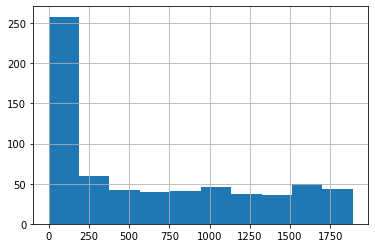

In [5]:
#breakdown of players by playing time
currentpoints_df['minutes'].hist()

In [6]:
#remove players who have played less than 250min this season
currentpoints_df = currentpoints_df[currentpoints_df.minutes >250]

(369, 35)


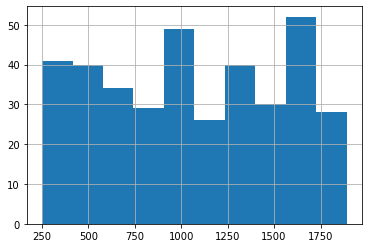

In [7]:
currentpoints_df['minutes'].hist()
print(currentpoints_df.shape)

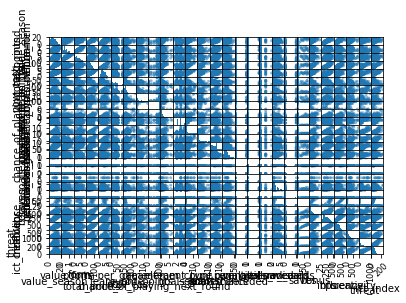

In [8]:
#check for patterns on scatter matrix
scatter_plot = scatter_matrix(currentpoints_df[['value_season','value_form','form',
                                 'total_points','points_per_game','team',
                                 'team_code','now_cost',
                                 'event_points','chance_of_playing_next_round',
                                'dreamteam_count','element_type','goals_scored',
                                 'assists','clean_sheets','goals_conceded',
                                 'own_goals','penalties_saved', 'penalties_missed',
                                 'yellow_cards','red_cards','saves','bonus','bps',
                                 'influence','creativity','threat','ict_index']])
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.savefig('linearregression.png')
plt.show()

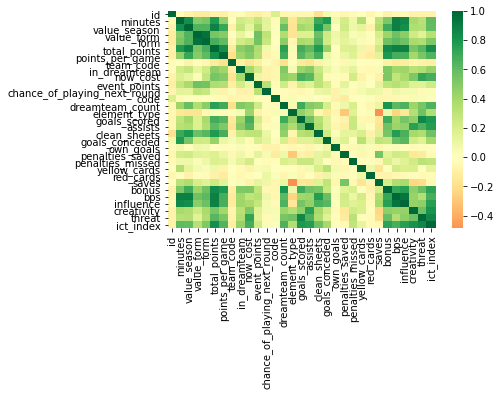

<Figure size 432x288 with 0 Axes>

In [9]:
#Try sns heatmap 
heatmap = sns.heatmap(currentpoints_df.corr(), 
                      xticklabels=currentpoints_df.corr().columns,
                      yticklabels=currentpoints_df.corr().columns,
                      cmap = 'RdYlGn', 
                      center=0,
                      annot=False)
plt.savefig('sns heatmap.png')
plt.show()
fig = matplotlib.pyplot.gcf()

In [10]:
#Keep important variables
df = currentpoints_df[['minutes', 'value_season','value_form','total_points',
 'points_per_game','in_dreamteam','now_cost','event_points',
 'dreamteam_count', 'element_type','goals_scored','assists', 
 'clean_sheets', 'goals_conceded', 'penalties_saved', 'penalties_missed', 
 'yellow_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 
 'threat', 'ict_index']]
df

,minutes,value_season,value_form,total_points,points_per_game,in_dreamteam,now_cost,event_points,dreamteam_count,element_type,...,penalties_saved,penalties_missed,yellow_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,1890,14.8,0.5,74,3.5,False,50,6,0,1,...,1,0,2,77,6,397,594.0,0.0,0.0,59.5
1,1890,18.3,0.9,97,4.6,False,53,1,4,3,...,0,0,3,0,13,333,503.2,110.6,590.0,120.4
2,1890,13.7,1.0,74,3.5,False,54,5,1,2,...,0,0,5,0,4,389,456.0,58.2,300.0,81.5
3,1890,15.0,1.1,72,3.4,False,48,8,3,1,...,1,0,2,65,10,366,474.8,0.0,0.0,47.4
4,1890,15.4,0.7,77,3.7,False,50,1,2,2,...,0,0,4,0,7,381,391.4,286.7,160.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,262,0.0,0.0,0,0.0,False,42,0,0,2,...,0,0,2,0,0,32,40.8,11.3,18.0,6.9
365,260,3.0,0.1,17,1.9,False,57,0,0,3,...,0,0,0,0,0,66,67.6,78.0,78.0,22.4
366,257,2.6,0.0,17,1.5,False,66,0,0,3,...,0,0,0,0,0,67,75.6,40.1,59.0,17.5
367,252,1.6,0.1,7,1.2,False,44,2,0,2,...,0,0,1,0,0,36,41.0,38.2,8.0,8.8


In [11]:
print(df.describe())

           minutes  value_season  value_form  total_points  points_per_game  \
count   369.000000    369.000000  369.000000    369.000000       369.000000   
mean   1063.271003      8.007859    0.398374     44.720867         2.998645   
std     483.306762      4.238542    0.325205     27.192563         1.303037   
min     251.000000      0.000000    0.000000      0.000000         0.000000   
25%     651.000000      4.900000    0.100000     24.000000         2.100000   
50%    1041.000000      7.500000    0.300000     39.000000         2.800000   
75%    1506.000000     11.100000    0.600000     62.000000         3.800000   
max    1890.000000     20.200000    1.500000    146.000000         7.500000   

         now_cost  event_points  dreamteam_count  element_type  goals_scored  \
count  369.000000    369.000000       369.000000    369.000000    369.000000   
mean    54.883469      2.246612         0.617886      2.607046      1.430894   
std     13.558247      2.894221         1.009630

In [12]:
#fit transform Y then split data

In [13]:
#Create a train test split
y = df['total_points']
X = df.drop(columns=['total_points'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
X_train.head(5)

,minutes,value_season,value_form,points_per_game,in_dreamteam,now_cost,event_points,dreamteam_count,element_type,goals_scored,...,penalties_saved,penalties_missed,yellow_cards,saves,bonus,bps,influence,creativity,threat,ict_index
285,589,1.9,0.0,1.4,False,52,0,0,2,0,...,0,0,0,0,0,94,106.8,18.1,0.0,12.5
150,1231,8.2,0.5,2.6,False,45,1,0,2,0,...,0,0,2,0,2,216,239.2,20.2,13.0,27.4
91,1514,6.3,0.4,4.2,False,113,0,1,3,5,...,0,0,2,0,6,202,272.2,226.3,519.0,101.8
238,834,6.7,0.5,2.0,False,42,2,0,3,1,...,0,0,2,0,0,72,89.4,154.7,300.0,53.9
368,251,2.0,0.0,1.8,False,45,0,0,3,0,...,0,0,0,0,0,24,12.0,7.9,13.0,3.3


In [15]:
#check number of examples to give neural network 
df.total_points.value_counts()

31     10
32      9
28      9
23      8
30      8
       ..
99      1
101     1
110     1
116     1
0       1
Name: total_points, Length: 104, dtype: int64

In [25]:
#Scale the data using MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
#Scale the data using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
label_encoder_test = LabelEncoder()
label_encoder_test.fit(y_test)
encoded_y_test = label_encoder_test.transform(y_test)
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [18]:
y_train_categorical.shape

(276, 98)

In [19]:
#Train the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=23))
model.add(Dropout(.25))
model.add(Dense(units=1))

In [20]:
#Complete and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['mean_squared_error'])

In [21]:
#Check model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1536      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
#set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model.fit(X_train_scaled, y_train, callbacks=callbacks, epochs=300, shuffle=True, verbose=2)

ValueError: You are passing a target array of shape (276, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [28]:
#evaluate model accuracy
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (62,)

In [31]:
#Check model predictions
y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred).flatten()

y_pred = pd.Series(y_pred).apply(lambda prediction: 0 if prediction < 0 else prediction).to_numpy()

In [32]:
y_pred[y_pred == y_test]

array([], dtype=float64)

In [39]:
y_test

302    35
122    78
228    43
257    23
102    51
       ..
162    31
93     54
324    15
59     58
12     75
Name: total_points, Length: 93, dtype: int64

In [40]:
#RANDOM TESTING
#create pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

#load iris dataset and split into train and test sets 
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#fit the pipeline
pipe.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
               ('logisticregression',LogisticRegression())])
#show accuracy score
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

In [41]:
#RANDOM CROSS-VALIDATION
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()
result = cross_validate(lr, X, y)
result['test_score']

array([1., 1., 1., 1., 1.])

In [43]:
#check ICT index mean to see what is the average (54.99)
X_train.ict_index.mean()

AttributeError: 'numpy.ndarray' object has no attribute 'ict_index'

In [29]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

C:\Users\izoto\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
filename = 'points_learning.sav'
joblib.dump(model, filename)

['points_learning.sav']